In [67]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore') 

In [3]:
data = pd.read_csv('/content/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#categorical_features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('categorical_features:', categorical_features)

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [7]:
#numerical_features

numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



<Axes: xlabel='Sales', ylabel='Count'>

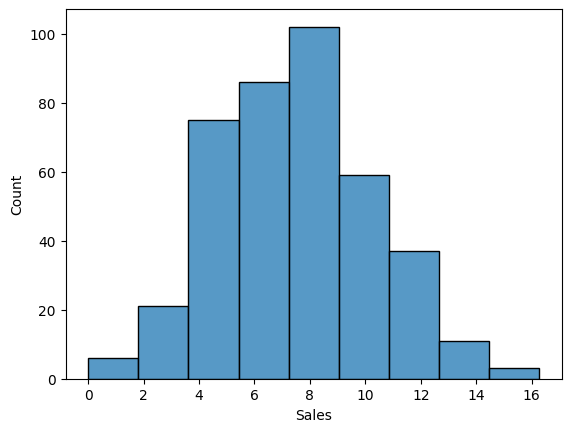

In [10]:
sns.histplot(data.Sales, bins=9)

In [9]:
data.Sales.max() / 3 

5.423333333333333

In [11]:
data1 = data.copy()
data1['Sales_category'] = pd.cut(x = data1['Sales'], bins = [0, 5.5 ,11, 17], labels=['Low','Medium','High'], right = False)
data1 = data1.drop(columns=['Sales'])

In [26]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
data1.Sales_category.value_counts()

Medium    248
Low       103
High       49
Name: Sales_category, dtype: int64

Histogram for numerical features

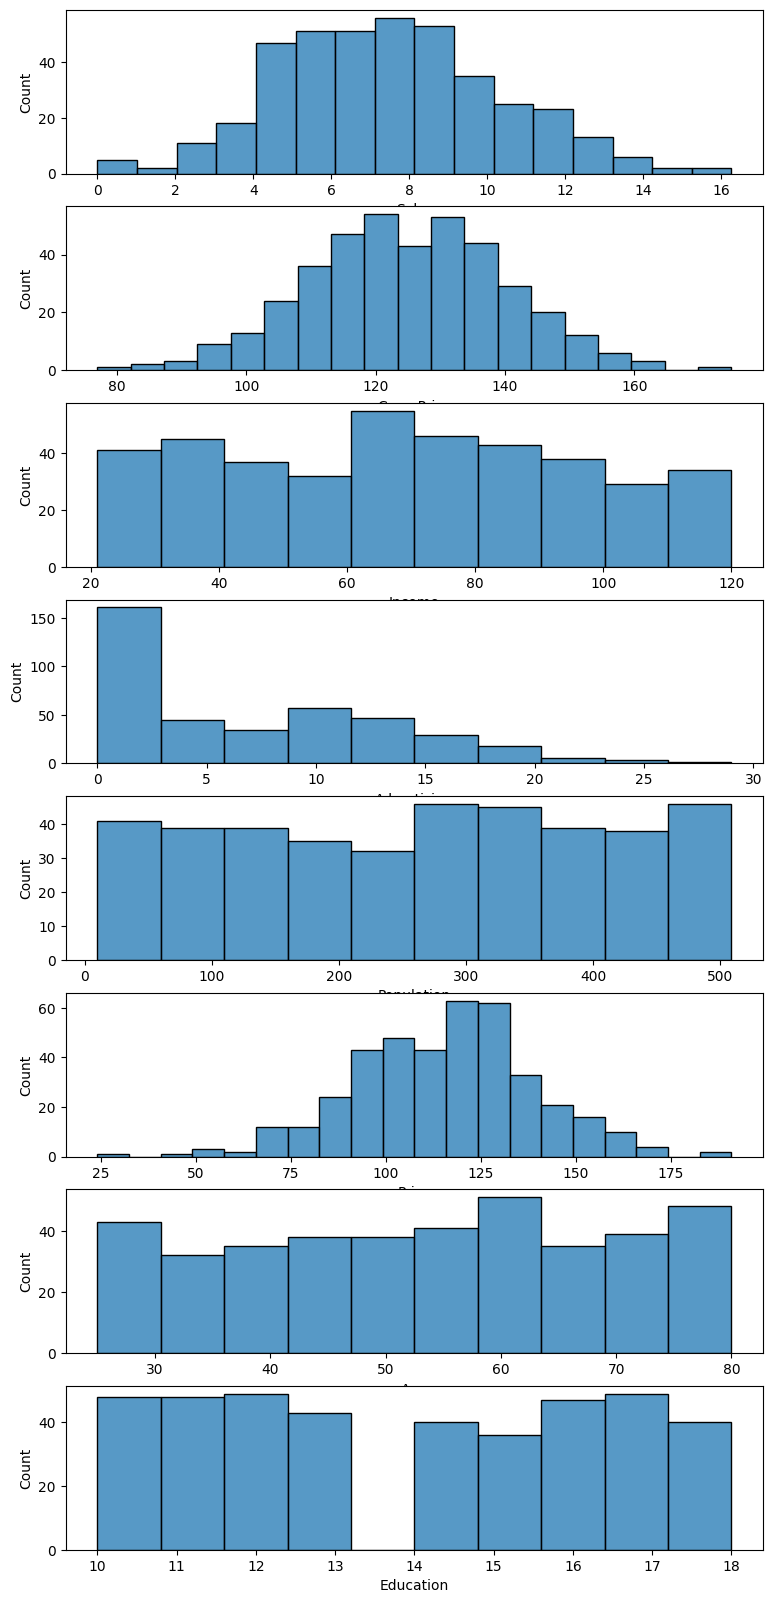

In [32]:
# for numerical_features -- histogram
fig, axes=plt.subplots(len(numeric_features),1,figsize=(9,20))

for i in range (0, len(numeric_features)):
    sns.histplot(data[numeric_features[i]],ax=axes[i])

Boxplot for outlier detection

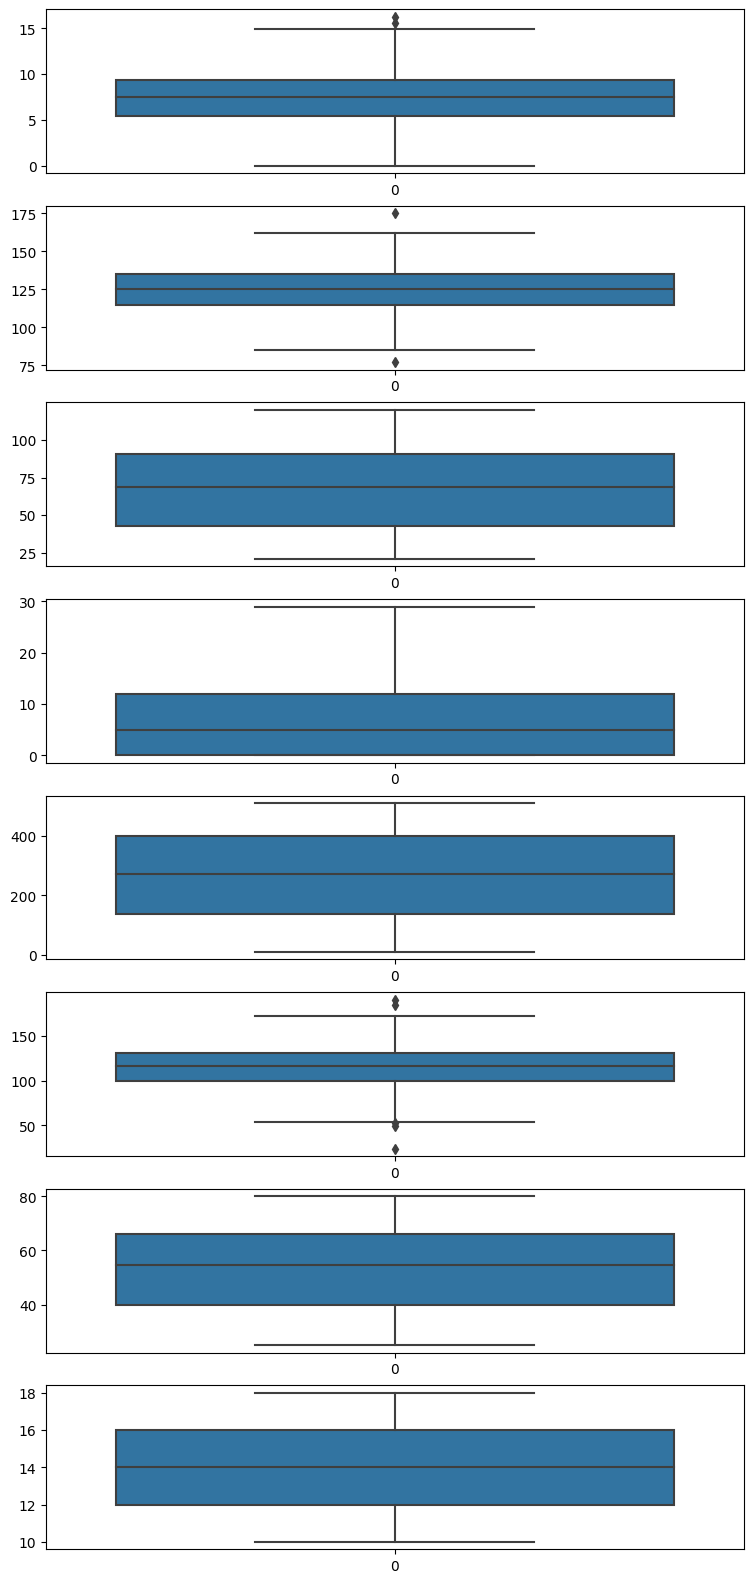

In [43]:
fig, axes=plt.subplots(len(numeric_features),1,figsize=(9,20))

for i in range (0, len(numeric_features)):
    sns.boxplot(data[numeric_features[i]],ax=axes[i])

In [44]:
data2 = data1.copy()

for feature in numeric_features:
    Q1,Q3 = np.percentile(data[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = data[feature][(data[feature] < ll) |  (data[feature] > ul)]
    
    data2=data2.drop(outliers.index[:] , errors="ignore")
    
    outliers=0 

In [45]:
y = data2['Sales_category']
x= data2.drop(['Sales_category'], axis=1) 

In [47]:
x = pd.get_dummies(x)

In [46]:
le = LabelEncoder()
y = le.fit_transform(y)

In [48]:
#selecting of features
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2 

In [49]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y) 

# summarize scores
scores = fit.scores_
features = fit.transform(x) 

score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


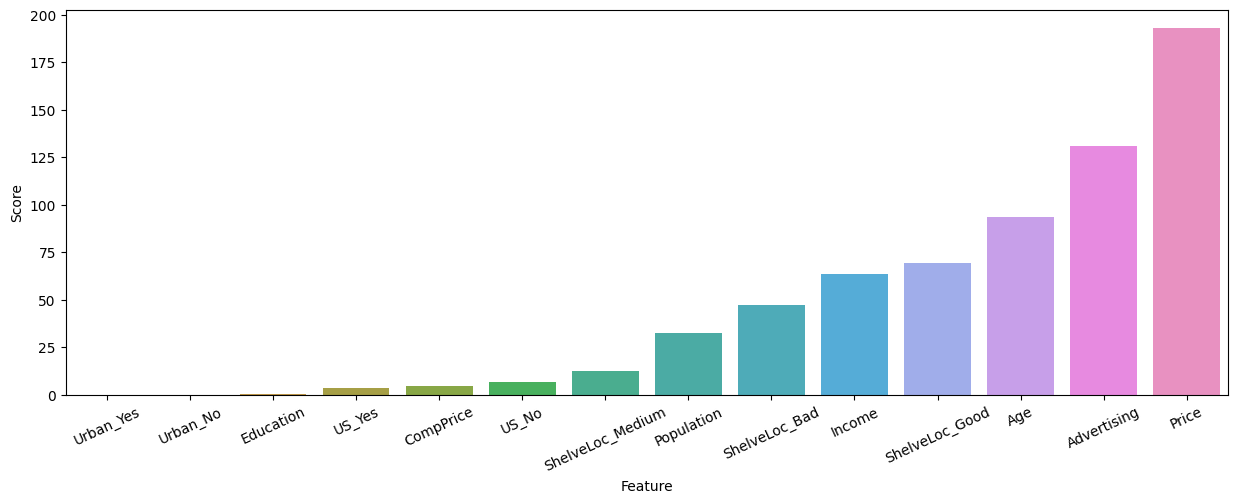

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 25, fontsize = 10)
plt.show()

In [56]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

model_data_y = y 
model_data_y[:5]

array([2, 0, 2, 2, 1])

In [57]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

In [58]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (313, 10)
Shape of X_test:  (79, 10)
Shape of y_train:  (313,)
Shape of y_test (79,)


Random forest classifier

In [61]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, model_data_x, model_data_y, cv=kfold)

print('Batchwise accuracy is:', '\n', results, '\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.7        0.675      0.76923077 0.74358974 0.71794872 0.64102564
 0.71794872 0.76923077 0.71794872 0.69230769] 

Overall accuracy is: 0.714423076923077


In [74]:
#Grid search hyper parameter tuning
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)